## Prepare Cutouts from JWST Data

In [1]:
import os, sys

from importlib import reload

import numpy as np
import numpy.linalg as la
from numpy import fft

import matplotlib as mpl
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import AsinhStretch
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
from astropy.visualization import astropy_mpl_style
from astropy.stats import sigma_clipped_stats
from astropy.nddata import NDData

from photutils.detection import DAOStarFinder
from photutils.psf import EPSFBuilder
from photutils.psf import extract_stars
from photutils.centroids import centroid_com

from scipy.ndimage import shift

stretch = AsinhStretch()

plt.style.use(astropy_mpl_style)
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['image.interpolation'] = 'nearest'

%matplotlib inline
%config InlineBackend.figure_format='retina'

import testing functions from `../src/`

In [2]:
sys.path.append('..')

import dither.utils as dutils

### Make Cutouts

Prepare Observation Data

In [4]:
IMG_DIR = '/quasar/data/GO1764/NIRCam/redux_v01/'

img_paths = []
# F250M data: *jw01764001001_02101*
# F430M data: *jw01764001001_06101*
for filename in os.listdir(IMG_DIR): 
    if 'jw01764001001_06101' in filename and 'nrcblong' in filename:
        img_paths.append(os.path.join(IMG_DIR, filename))
img_paths.sort()

img_paths

['/quasar/data/GO1764/NIRCam/redux_v01/jw01764001001_06101_00001_nrcblong_cal_bsub_aligned.fits',
 '/quasar/data/GO1764/NIRCam/redux_v01/jw01764001001_06101_00002_nrcblong_cal_bsub_aligned.fits',
 '/quasar/data/GO1764/NIRCam/redux_v01/jw01764001001_06101_00003_nrcblong_cal_bsub_aligned.fits',
 '/quasar/data/GO1764/NIRCam/redux_v01/jw01764001001_06101_00004_nrcblong_cal_bsub_aligned.fits',
 '/quasar/data/GO1764/NIRCam/redux_v01/jw01764001001_06101_00005_nrcblong_cal_bsub_aligned.fits',
 '/quasar/data/GO1764/NIRCam/redux_v01/jw01764001001_06101_00006_nrcblong_cal_bsub_aligned.fits',
 '/quasar/data/GO1764/NIRCam/redux_v01/jw01764001001_06101_00007_nrcblong_cal_bsub_aligned.fits',
 '/quasar/data/GO1764/NIRCam/redux_v01/jw01764001001_06101_00008_nrcblong_cal_bsub_aligned.fits',
 '/quasar/data/GO1764/NIRCam/redux_v01/jw01764001001_06101_00009_nrcblong_cal_bsub_aligned.fits']

AGN Coordinate

In [5]:
agn_coord = SkyCoord("J100758.26+211529.2", unit=(u.hourangle, u.deg), frame='icrs')

agn_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (151.99275, 21.25811111)>

Image Cutout

In [6]:
radius = 5 # arcsec
cutout_dir = '/quasar/yichenliu/cutout_f430m'
cutout_paths = []
for fits_path in img_paths: 
    print(f' processing {fits_path}')
    directory = os.path.dirname(fits_path)
    filename = os.path.basename(fits_path)
    cutout_path = os.path.join(cutout_dir, filename[:-5]+'_cutout.fits')
    try: 
        dutils.create_cutout_fits(fits_path, cutout_path, agn_coord, radius)
    except OSError as E: 
        print(f'  ERROR: {E}')
    cutout_paths.append(cutout_path)
    # break

 processing /quasar/data/GO1764/NIRCam/redux_v01/jw01764001001_06101_00001_nrcblong_cal_bsub_aligned.fits
  ERROR: File /quasar/yichenliu/cutout_f430m/jw01764001001_06101_00001_nrcblong_cal_bsub_aligned_cutout.fits already exists. If you mean to replace it then use the argument "overwrite=True".
 processing /quasar/data/GO1764/NIRCam/redux_v01/jw01764001001_06101_00002_nrcblong_cal_bsub_aligned.fits


Set DATE-AVG to '2023-05-10T04:37:31.398' from MJD-AVG.
Set DATE-END to '2023-05-10T04:40:12.450' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -21.996270 from OBSGEO-[XYZ].
Set OBSGEO-H to 1540955597.389 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2023-05-10T04:44:19.397' from MJD-AVG.
Set DATE-END to '2023-05-10T04:47:00.449' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -21.999115 from OBSGEO-[XYZ].
Set OBSGEO-H to 1540996258.426 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


  ERROR: File /quasar/yichenliu/cutout_f430m/jw01764001001_06101_00002_nrcblong_cal_bsub_aligned_cutout.fits already exists. If you mean to replace it then use the argument "overwrite=True".
 processing /quasar/data/GO1764/NIRCam/redux_v01/jw01764001001_06101_00003_nrcblong_cal_bsub_aligned.fits
  ERROR: File /quasar/yichenliu/cutout_f430m/jw01764001001_06101_00003_nrcblong_cal_bsub_aligned_cutout.fits already exists. If you mean to replace it then use the argument "overwrite=True".
 processing /quasar/data/GO1764/NIRCam/redux_v01/jw01764001001_06101_00004_nrcblong_cal_bsub_aligned.fits
  ERROR: File /quasar/yichenliu/cutout_f430m/jw01764001001_06101_00004_nrcblong_cal_bsub_aligned_cutout.fits already exists. If you mean to replace it then use the argument "overwrite=True".
 processing /quasar/data/GO1764/NIRCam/redux_v01/jw01764001001_06101_00005_nrcblong_cal_bsub_aligned.fits


Set DATE-AVG to '2023-05-10T04:50:56.645' from MJD-AVG.
Set DATE-END to '2023-05-10T04:53:37.697' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -22.001554 from OBSGEO-[XYZ].
Set OBSGEO-H to 1541031103.461 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2023-05-10T04:57:44.644' from MJD-AVG.
Set DATE-END to '2023-05-10T05:00:25.696' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -22.004399 from OBSGEO-[XYZ].
Set OBSGEO-H to 1541071747.526 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2023-05-10T05:04:21.892' from MJD-AVG.
Set DATE-END to '2023-05-10T05:07:02.944' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -22.007244 from OBSGEO-[XYZ].
Set OBSGEO-H to 1541112382.470 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Set DATE-AVG to '2023-05-10T05:11:09.892' from MJD-AVG.
Set DATE-END to '2023-05-10T05:13:50.944' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -22.010088 from OBSGEO-[XYZ].
Set OBSGEO-H to 1541153008.300 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2023-05-10T05:17:47.203' from MJD-AVG.
Set DATE-END to '2023-05-10T05:20:28.255' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -22.012526 from OBSGEO-[XYZ].
Set OBSGEO-H to 1541187823.192 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


  ERROR: File /quasar/yichenliu/cutout_f430m/jw01764001001_06101_00005_nrcblong_cal_bsub_aligned_cutout.fits already exists. If you mean to replace it then use the argument "overwrite=True".
 processing /quasar/data/GO1764/NIRCam/redux_v01/jw01764001001_06101_00006_nrcblong_cal_bsub_aligned.fits
  ERROR: File /quasar/yichenliu/cutout_f430m/jw01764001001_06101_00006_nrcblong_cal_bsub_aligned_cutout.fits already exists. If you mean to replace it then use the argument "overwrite=True".
 processing /quasar/data/GO1764/NIRCam/redux_v01/jw01764001001_06101_00007_nrcblong_cal_bsub_aligned.fits
  ERROR: File /quasar/yichenliu/cutout_f430m/jw01764001001_06101_00007_nrcblong_cal_bsub_aligned_cutout.fits already exists. If you mean to replace it then use the argument "overwrite=True".
 processing /quasar/data/GO1764/NIRCam/redux_v01/jw01764001001_06101_00008_nrcblong_cal_bsub_aligned.fits
  ERROR: File /quasar/yichenliu/cutout_f430m/jw01764001001_06101_00008_nrcblong_cal_bsub_aligned_cutout.fits 

Set DATE-AVG to '2023-05-10T05:24:24.451' from MJD-AVG.
Set DATE-END to '2023-05-10T05:27:05.503' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -22.015370 from OBSGEO-[XYZ].
Set OBSGEO-H to 1541228432.131 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2023-05-10T05:31:12.450' from MJD-AVG.
Set DATE-END to '2023-05-10T05:33:53.502' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -22.018213 from OBSGEO-[XYZ].
Set OBSGEO-H to 1541269031.904 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Display Cutouts

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]
(array(78.41118427),

Set OBSGEO-B to   -21.996270 from OBSGEO-[XYZ].
Set OBSGEO-H to 1540955597.389 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -21.999115 from OBSGEO-[XYZ].
Set OBSGEO-H to 1540996258.426 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -22.001554 from OBSGEO-[XYZ].
Set OBSGEO-H to 1541031103.461 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -22.004399 from OBSGEO-[XYZ].
Set OBSGEO-H to 1541071747.526 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -22.007244 from OBSGEO-[XYZ].
Set OBSGEO-H to 1541112382.470 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -22.010088 from OBSGEO-[XYZ].
Set OBSGEO-H to 1541153008.300 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -22.012526 from OBSGEO-[XYZ].
Set OBSGEO-H to 1541187823.192 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -22.015370 from OBSGEO-[XYZ].
Set OBSGEO-H to 1541228432.130 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]
(array(78.53798518),

Set OBSGEO-B to   -22.018213 from OBSGEO-[XYZ].
Set OBSGEO-H to 1541269031.904 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


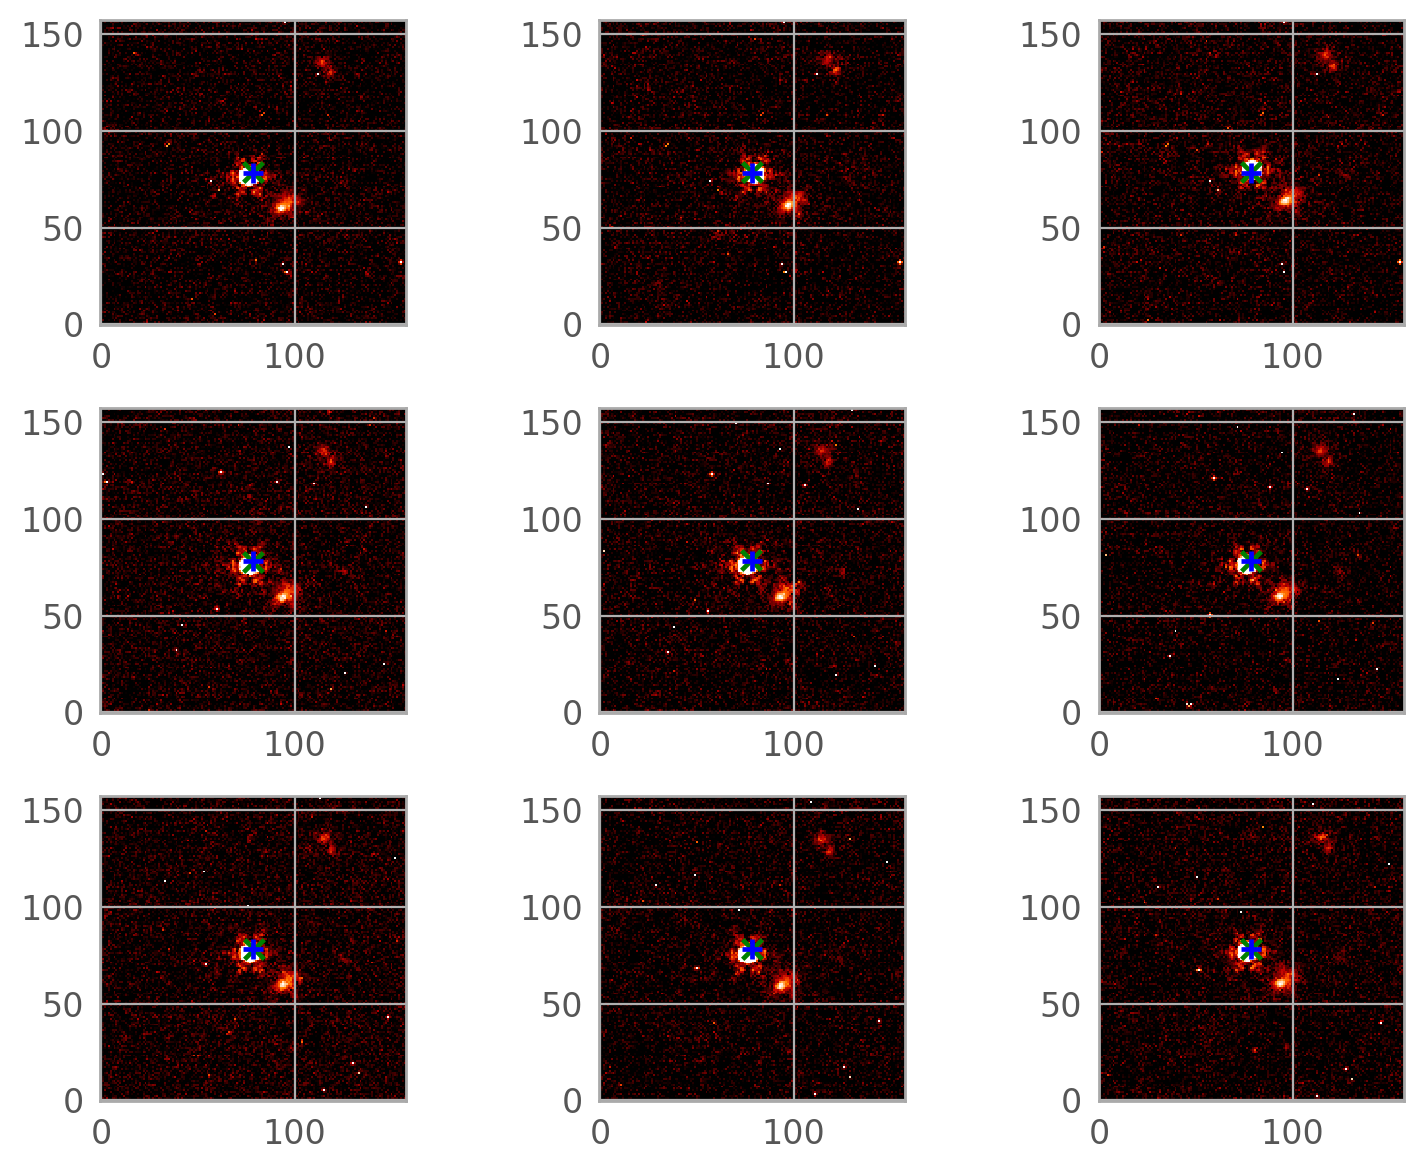

In [7]:
fig, axs = plt.subplots(3, 3)
axs = axs.flat

agn_pixels = []
for i in range(9): 
    # TODO: 
    with fits.open(cutout_paths[i]) as hdul: 
        data = hdul[1].data
        wcs = WCS(hdul[1].header)
        agn_pixel = wcs.world_to_pixel(agn_coord)
        print(agn_pixel)
        axs[i].imshow(stretch(data))
        axs[i].scatter(agn_pixel[0], agn_pixel[1], marker='x', c='g', s=50)
        x, y, _ = dutils.get_pixel_center_coordinate(cutout_paths[i])
        axs[i].scatter(x, y, marker='+', c='b', s=50)
        agn_pixels.append(agn_pixel)
        # axs[i].grid(False)

agn_pixels = np.array(agn_pixels)

plt.tight_layout()

In [8]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2023-05-19T18:27:48.037' / UTC date file created                     
ORIGIN  = 'STSCI   '           / Organization responsible for creating file     
TIMESYS = 'UTC     '           / principal time system for time-related keywords
TIMEUNIT= 's       '           / Default unit applicable to all time values     
FILENAME= 'jw01764001001_06101_00009_nrcblong_cal_bsub_aligned.fits' / Name of t
SDP_VER = '2022_5c '           / Data processing software version number        
PRD_VER = 'PRDOPSSOC-060'      / S&OC PRD version number used in data processing
OSS_VER = '8.6     '           / Observatory Scheduling Software (OSS) version n
CAL_VER = '1.10.2  '        